In [1]:
def importdata():
    df = pd.read_csv('../data/df_points_valid_geo_split_at_midnight_add_h3_index_v100.csv')
    df = df[['bike_id','lat','lng','timestood','time_start','time_end','flag','hex_id']]
    
    df['time_start'] = pd.to_datetime(df['time_start'])
    
    return df

In [2]:
def create_onedf_hexid(df,hex_id):
    onedfhexid = pd.DataFrame(columns= ['bike_id','lat','lng','timestood','time_start','time_end','flag','hex_id'])
    for ind in df.index:
        if df['hex_id'][ind] == hex_id:
            onedfhexid.loc[df.index[ind]] = df.iloc[ind]
            #onedfhexid.append(df[ind], ignore_index = True)
    return onedfhexid.reset_index(drop=True)

In [3]:
def create_tsdata():
    rng = pd.date_range('2019-01-01', periods=365, freq='D')
    tsdata = pd.DataFrame({ 'date': rng, 'idle_time' : np.nan, 'bike_count': np.nan}) 
    return tsdata.set_index('date')

In [4]:
def add_rows_to_days(tsdata,onedfhexid):
    # iteriere über alle Tage
    for date in tqdm(tsdata.index):
        list = []
        # Adde alle Rows in die List wenn Tag = Tag
        for ind in onedfhexid.index:
            if date.date() == onedfhexid['time_start'][ind].date():
                list.append(onedfhexid['timestood'][ind])
        #print(len(list))        
        # Setze Mittelwert für Tage
        if len(list) == 0:
            tsdata['bike_count'][date] = 1
            continue
        else:
            tsdata['bike_count'][date] = len(list)
            tsdata['idle_time'][date] = statistics.mean(list)
    return tsdata

In [5]:
def get_rows_one_day(day,onedfhexid):
    list=[]
    for ind in onedfhexid.index:
        if day == onedfhexid['time_start'][ind].date():
            list.append(onedfhexid['timestood'][ind])
    print(list)
    print(statistics.mean(list))

In [6]:
def plot(x):
    
    fig, ax1 = plt.subplots(figsize = (20,10))
    
    # plotting daily data
    ax1.plot(x['idle_time'], linewidth=2,color='red', label='Idle Time Mean')
    ax1.set_xlabel('day')
    ax1.set_ylabel('timestood (min)')
    ax1.tick_params(axis ='y', labelcolor = 'red') 
    
    ax2 = ax1.twinx()
    
    ax2.plot(x['bike_count'], linewidth=2, label='bike_count')
    ax2.set_ylabel('bike_count')
    ax2.tick_params(axis ='y', labelcolor = 'blue') 


    
    plt.show()


In [7]:
def fix_missing_values(tsdata):
    data_freq = tsdata.asfreq('D')
    data_freq = data_freq.ffill()
    return data_freq

# Main

In [8]:
import pandas as pd
pd.options.mode.chained_assignment = None
from tqdm import tqdm
from datetime import timedelta, datetime, date
pd.set_option('display.max_rows', None)

import numpy as np
import statistics
import matplotlib.pyplot as plt


year = 2019
#hex_id = '8a1f1a8d9d97fff'
#hex_id = '8a1f1a8cb4cffff'
#hex_id = '8a1f1a8cb4dffff'
hex_id = '8a1f1a8cb71ffff'

df = importdata()

onedfhexid = create_onedf_hexid(df,hex_id)
#onedfhexid

tsdata = create_tsdata()
#tsdata

tsdata = add_rows_to_days(tsdata,onedfhexid)

tsdata = fix_missing_values(tsdata)
tsdata

#plot(data_freq)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 365/365 [00:06<00:00, 57.96it/s]


,idle_time,bike_count
date,,
2019-01-01,NaN,1.0
2019-01-02,186.000000,1.0
2019-01-03,978.000000,1.0
2019-01-04,978.000000,1.0
2019-01-05,31.000000,1.0
2019-01-06,31.000000,1.0
2019-01-07,31.000000,1.0
2019-01-08,49.750000,4.0
2019-01-09,49.750000,1.0


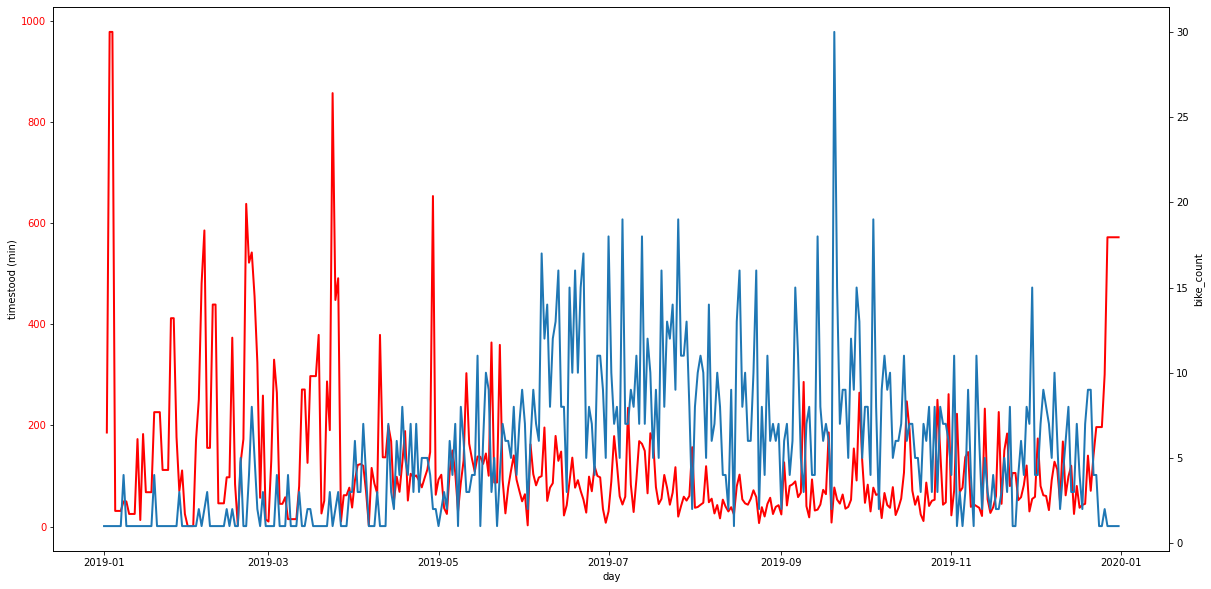

In [94]:
plot(tsdata)

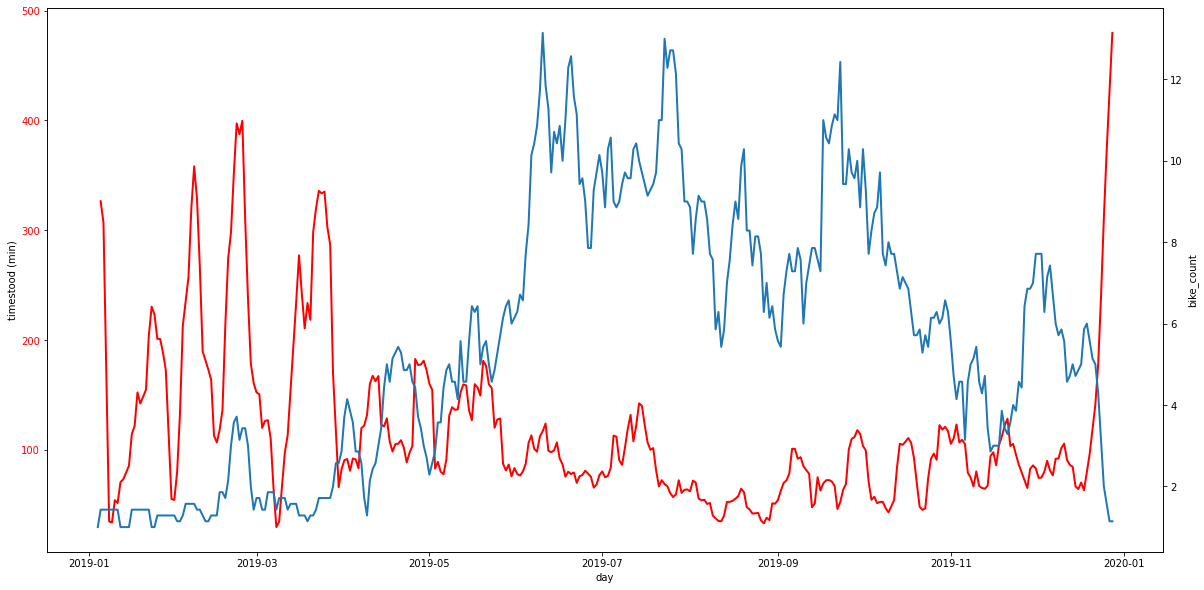

In [95]:
data_columns = ['idle_time','bike_count']
data_7d_rol = tsdata[data_columns].rolling(window = 7, center = True).mean()
plot(data_7d_rol)

# Main2 Plot of all Leipzig !
## all hex df


In [103]:
def all_add_rows_to_days(tsdata,df):
    # iteriere über alle Tage
    for date in tqdm(tsdata.index):
        list = []
        # Adde alle Rows in die List wenn Tag = Tag
        for ind in df.index:
            if date.date() == df['time_start'][ind].date():
                list.append(df['timestood'][ind])
        #print(len(list))        
        # Setze Mittelwert für Tage
        if len(list) == 0:
            tsdata['bike_count'][date] = 1
            continue
        else:
            tsdata['bike_count'][date] = len(list)
            tsdata['idle_time'][date] = statistics.mean(list)
    return tsdata

In [104]:
alltsdata = create_tsdata()
alltsdata = all_add_rows_to_days(alltsdata,df)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 365/365 [35:46<00:00,  5.88s/it]


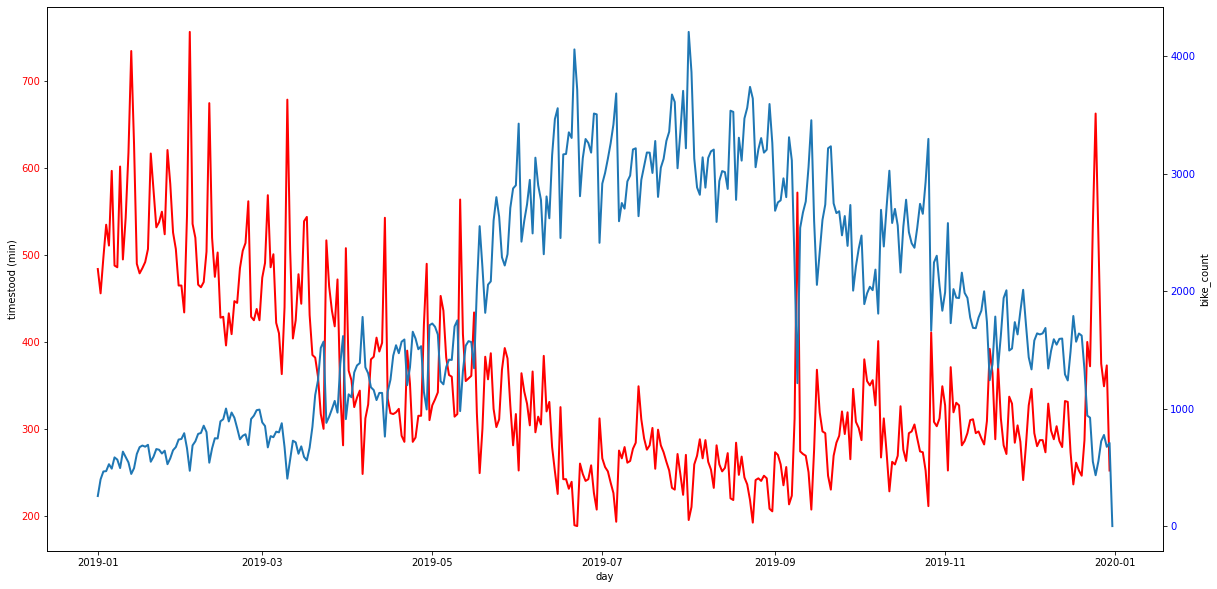

In [105]:
plot(alltsdata)

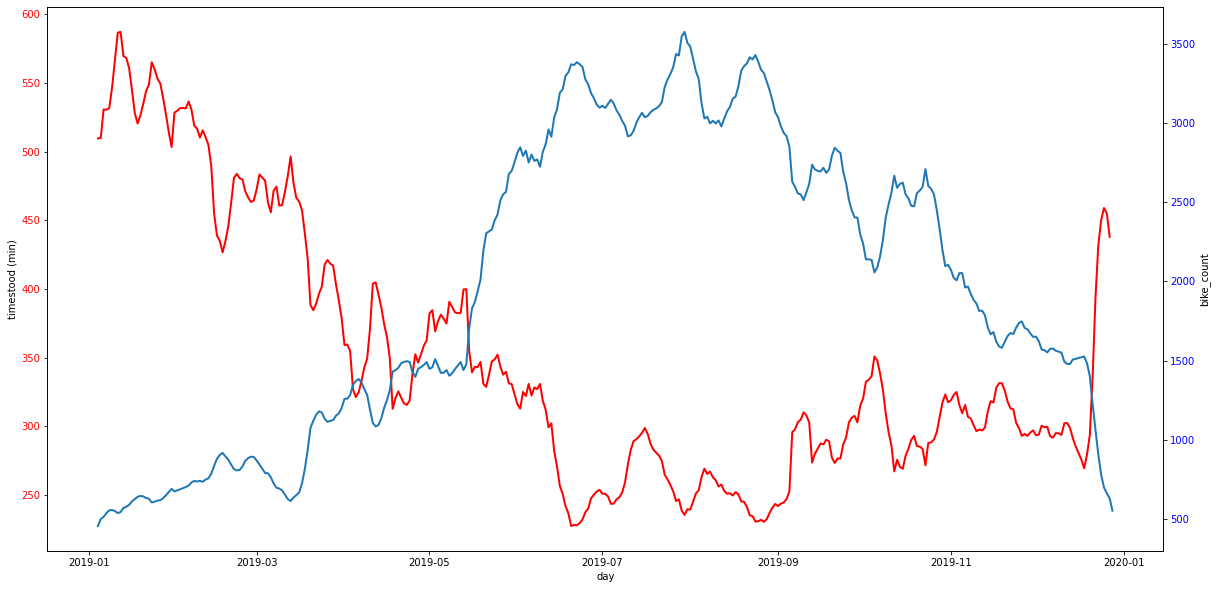

In [106]:
data_columns = ['idle_time','bike_count']
all_data_7d_rol = alltsdata[data_columns].rolling(window = 7, center = True).mean()
plot(all_data_7d_rol)

# Testing

In [97]:
data_2m_rol = tsdata[data_columns].rolling(window = 60, center = True).mean()

In [98]:
data_2m_rol

,idle_time,bike_count
date,,
2019-01-01,NaN,NaN
2019-01-02,NaN,NaN
2019-01-03,NaN,NaN
2019-01-04,NaN,NaN
2019-01-05,NaN,NaN
2019-01-06,NaN,NaN
2019-01-07,NaN,NaN
2019-01-08,NaN,NaN
2019-01-09,NaN,NaN


Text(0.5, 1.0, 'Trends in idel time of bikes in hex: 8a1f1a8cb71ffff')

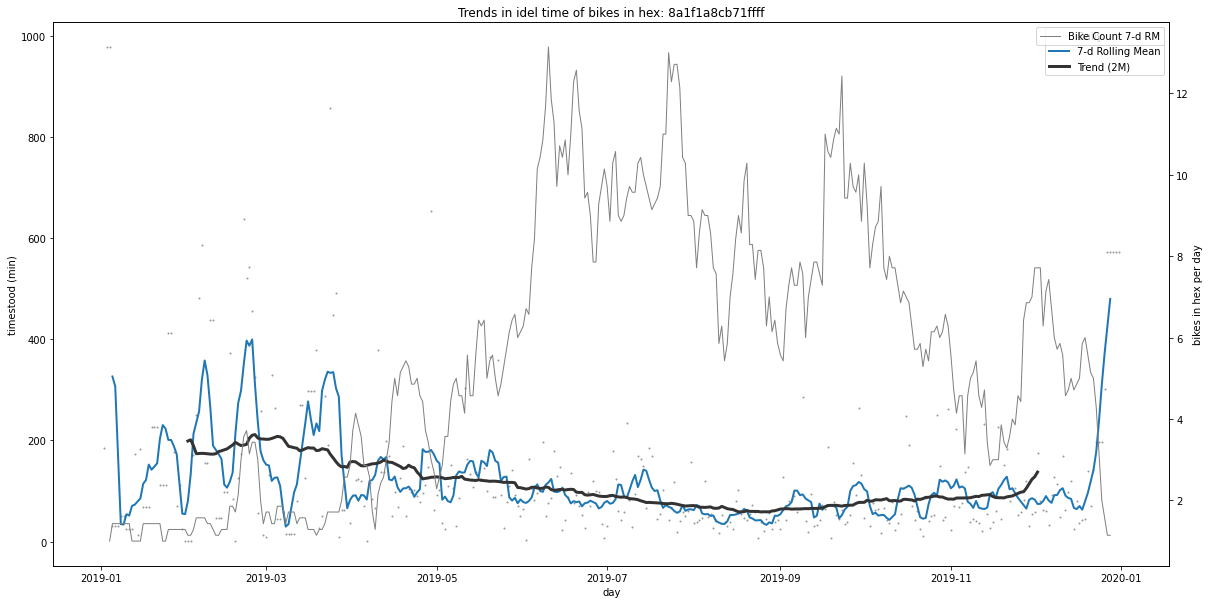

In [99]:
fig, ax = plt.subplots(figsize = (20,10))
# plotting daily data
ax.plot(tsdata['idle_time'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(data_7d_rol['idle_time'], linewidth=2, label='7-d Rolling Mean')
# plotting annual rolling data
ax.plot(data_2m_rol['idle_time'], color='0.2', linewidth=3, label='Trend (2M)')

ax2 = ax.twinx()
ax2.plot(data_7d_rol['bike_count'],linewidth=1, color='0.5',label='Bike Count 7-d RM')
ax2.set_xlabel('day')
ax2.set_ylabel('bikes in hex per day')
# Beautification of plot
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax2.legend()
ax.set_xlabel('day')
ax.set_ylabel('timestood (min)')
ax.set_title(f'Trends in idel time of bikes in hex: {hex_id}')

# DeTrend the data
## with first order

In [67]:
data_first_order_diff = tsdata[data_columns].diff()

In [68]:
data_first_order_diff

,idle_time,bike_count
date,,
2019-01-01,NaN,NaN
2019-01-02,196.294118,0.0
2019-01-03,-182.335863,14.0
2019-01-04,64.464346,7.0
2019-01-05,59.978469,-5.0
2019-01-06,41.815249,-2.0
2019-01-07,7.131720,5.0
2019-01-08,137.845238,-1.0
2019-01-09,40.988095,1.0


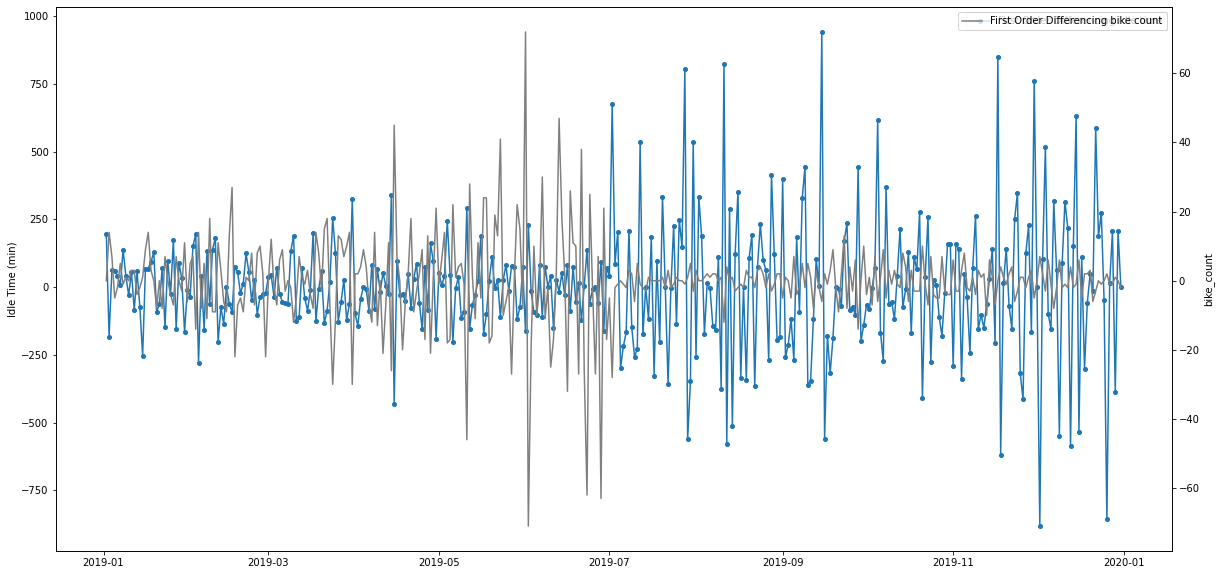

In [73]:
start, end = '2019-01', '2019-12'

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(data_first_order_diff.loc[start:end, 'idle_time'],
marker='o', markersize=4, linestyle='-', label='First Order Differencing idle time')
ax.set_ylabel('Idle Time (min)')
ax.legend();

# Second Y Axis

ax2 = ax.twinx()
ax2.plot(data_first_order_diff.loc[start:end, 'bike_count'], color='grey', label='First Order Differencing bike count')
ax2.set_ylabel('bike_count')
ax2.legend()

plt.show()


<AxesSubplot:xlabel='date'>

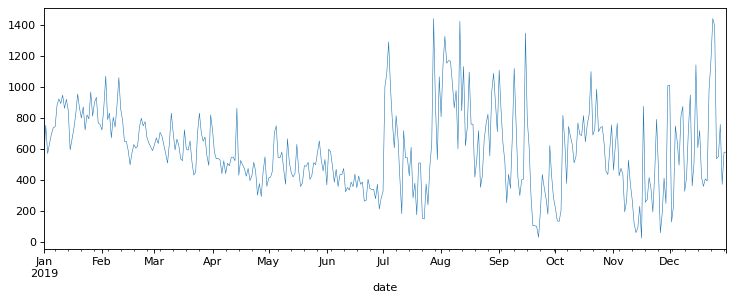

In [74]:
plt.figure(figsize=(11,4), dpi= 80)
tsdata['idle_time'].plot(linewidth = 0.5)

# Autocorellation

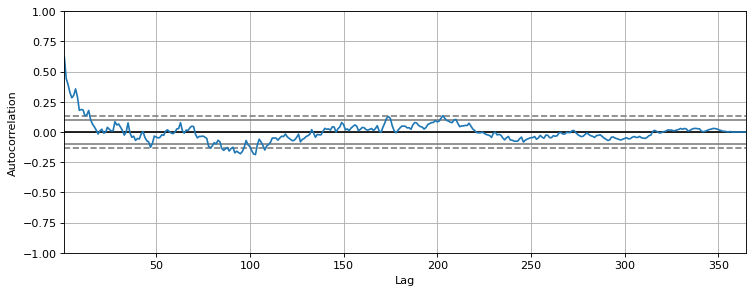

In [76]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(tsdata.loc['2019-01': '2019-12', 'idle_time']);